# **Gemini Pro and Vision: Free Python API**

This notebookl how to use Gemini API with python, which gives you access to Google's Gemini large language models

1. Installation
2. Import Packages
3. Setup your API key
4. List models
5. Generate text from text inputs
6. Generate text from image and text inputs

## **1. Installation**

### **Google AI Python SDK**

The Google AI Python SDK enables developers to use Google's state-of-the-art generative AI models (like Gemini and PaLM) to build AI-powered features and applications. This SDK supports use cases like:



1.   Generate text from text-only input
2.   Generate text from text-and-images input (multimodal) (for Gemini only)
3.   Build multi-turn conversations (chat)
4.   Embedding




In [ ]:
!pip install google-generativeai

## **2. Import Packages**

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

## **3.Setup your API key**

To use Gemini we need get the API key, which can be created with one Click Google AI Studio.


<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Google API key</a>

Add the key to the secrets manager in the left panel.

Give it the name GOOGLE_API_KEY.

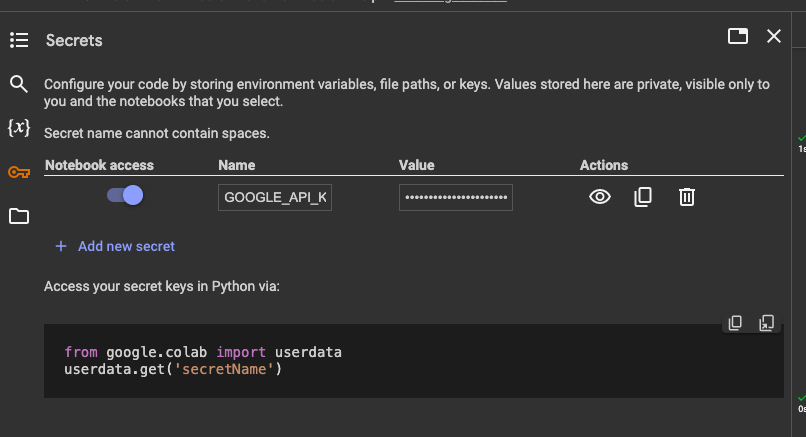

In [ ]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## **4.List models**

`list_models` to see the available Gemini models

1. `gemini-pro`: optimized for text-only prompts.
2. `gemini-pro-vision`: optimized for text-and-images prompts.

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/jkessinger-testonly
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision
models/jkessinger-testonly


## **5.Generate text from text inputs**

Text-only prompts - use the gemini-pro model

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
%%time
response = model.generate_content("What is life to you")

CPU times: user 84 ms, sys: 8.85 ms, total: 92.9 ms
Wall time: 6.13 s


In [ ]:
to_markdown(response.text)

> **Life to me is:**
> 
> **A precious gift:**
> * An extraordinary and fleeting opportunity to experience the world and all it has to offer.
> 
> **A journey of growth:**
> * A path filled with challenges, triumphs, and experiences that shape and mold us.
> 
> **A tapestry of relationships:**
> * Woven together with the threads of love, friendship, and connections that make it vibrant and meaningful.
> 
> **A canvas for creation:**
> * An opportunity to express ourselves, follow our passions, and leave our mark on the world.
> 
> **A dance with uncertainty:**
> * A constant interplay of joy, sorrow, hope, and fear, where the future holds both promise and trepidation.
> 
> **A symphony of senses:**
> * A kaleidoscope of sights, sounds, smells, tastes, and textures that enrich our existence.
> 
> **A sacred mystery:**
> * A profound and enigmatic force that we can appreciate but not fully comprehend.
> 
> **A responsibility:**
> * A calling to live with purpose, contribute to society, and make a positive impact on our environment.
> 
> **A celebration:**
> * An occasion to cherish every moment, appreciate the beauty of existence, and embrace both the joys and challenges that come our way.
> 
> **Ultimately, life is:**
> 
> * A priceless and irreplaceable experience that we should savor to the fullest.
> * A journey that we should embrace with curiosity, courage, and compassion.
> * A gift that we should honor by living a life filled with love, laughter, and meaning.

## **6.Generate text from image and text inputs**

Gemini provides a multimodal model (gemini-pro-vision) that accepts both text and images and inputs.

In [ ]:
!curl -o image.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2niUls-SlESF23XZGBlcilS1pQOcQ1fD5CA&usqp=CAU

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21838  100 21838    0     0   119k      0 --:--:-- --:--:-- --:--:--  119k


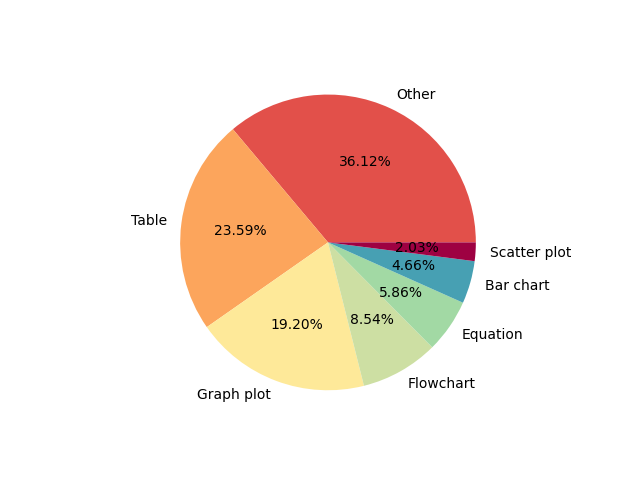

In [ ]:
import PIL.Image

img = PIL.Image.open('/content/scicap-sample-images')
img

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  The pie chart shows the percentage of different types of visualizations used in a report. The majority of the visualizations are tables, which account for 24%. The second most common type of visualization is graphs, which account for 19%. Other types of visualizations include charts, equations, and flowcharts.

In [ ]:
response = model.generate_content(["provide a Caption for this image ", img], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

>  This pie chart shows the percentage of different chart types used in a document. The chart types are: table, graph plot, equation, flowchart, bar chart, scatter plot, and other.

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os

images_path = '/content/scicap-sample-images'
file_names = os.listdir(images_path)
sorted_file_names = sorted(file_names)

# create an empty dataframe with desired columns
df = pd.DataFrame(columns=['FileName', 'Caption'])

# create an empty list to store dictionaries
dict_list = []

for file_name in sorted_file_names:
    try:
        #image, output = caption_image(f'/content/scicap-sample-images/{file_name}', 'Describe the image and color details.')


        img = Image.open(f'{images_path}/{file_name}')
        response = model.generate_content(["provide a Caption for this image ", img], stream=True)
        response.resolve()
        output = response.text
        #fig, ax = plt.subplots(figsize=(10, 10))
        row_dict = {'FileName': file_name, 'Caption': output}
        dict_list.append(row_dict)
        #ax.imshow(img)
        #ax.set_title(file_name)
        #ax.axis('off')
        print(file_name)
        #img.show()

        print(output)

    except Exception as e:
        print(f"Error processing {file_name}: {str(e)}")
        continue

df = pd.DataFrame(dict_list)


#display_images_from_directory(directory_path)
df

## **7.Refrence**



*   [Google AI Dev](https://ai.google.dev/)

